### **ERA5_LAND_DATSET[OBRAJILLO]-->RESTART_FILE** ###



<ipython-input-11-ef8a398a24ea>:16: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


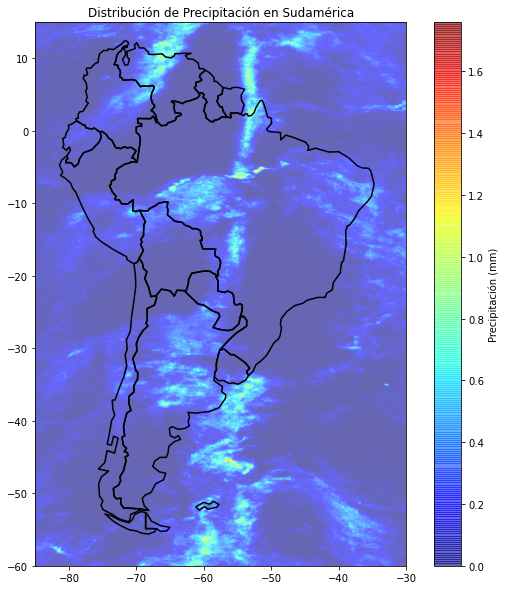

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from pyhdf.SD import SD, SDC
import geopandas as gpd

# Ruta del archivo HDF
file_path = '3B43.20191201.7.HDF'

# Abre el archivo HDF
hdf = SD(file_path, SDC.READ)

# Selecciona el dataset que deseas visualizar
data = hdf.select('precipitation')[:]

# Cargar el shapefile de Sudamérica utilizando GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
south_america = world[(world.continent == "South America")]

# Definir los límites de la región de Sudamérica
lat_min, lat_max = -60, 15
lon_min, lon_max = -85, -30

# Crear una figura
plt.figure(figsize=(10, 10))

# Dibujar los datos de precipitación
plt.imshow(data, extent=[lon_min, lon_max, lat_min, lat_max], origin='upper', cmap='jet', alpha=0.6)

# Superponer el mapa de Sudamérica
south_america.boundary.plot(ax=plt.gca(), color='k', linewidth=1.5)

# Añadir barra de colores
plt.colorbar(label='Precipitación (mm)')

# Título del gráfico
plt.title('Distribución de Precipitación en Sudamérica')

# Mostrar el gráfico
plt.show()


In [12]:
from pyhdf.SD import SD, SDC

# Ruta del archivo HDF
file_path = '3B43.20191201.7.HDF'

# Abre el archivo HDF
hdf = SD(file_path, SDC.READ)

# Inspección de Metadatos
print("Metadatos del archivo HDF:")
for key, value in hdf.attributes().items():
    print(f"{key}: {value}")

# Inspección de datasets disponibles
datasets_dict = hdf.datasets()
print("\nDatasets disponibles:")
for idx, dataset in enumerate(datasets_dict.keys()):
    print(f"{idx + 1}: {dataset}")

# Acceder a los datasets para promediar (suponiendo que hay datos en diferentes fechas)
# Ejemplo: Si los datos son en un array 3D con la tercera dimensión representando las fechas
try:
    data = hdf.select('precipitation')[:]  # Suponiendo que el dataset se llama 'precipitation'
    
    # Verificar las dimensiones del dataset
    print(f"\nDimensiones del dataset 'precipitation': {data.shape}")
    
    # Promedio sobre la dimensión temporal si es un array 3D
    if data.ndim == 3:
        avg_data = np.mean(data, axis=0)  # Promediar sobre el eje temporal
    else:
        avg_data = data  # Si es 2D, simplemente usa los datos
    
    print("\nPromedio calculado exitosamente.")
except Exception as e:
    print(f"Error al acceder al dataset: {e}")


Metadatos del archivo HDF:
FileHeader: AlgorithmID=3B43;
AlgorithmVersion=3B43_7.0;
FileName=3B43.20191201.7.HDF;
GenerationDateTime=2020-03-04T17:31:38.000Z;
StartGranuleDateTime=2019-12-01T00:00:00.000Z;
StopGranuleDateTime=2019-12-31T23:59:59.999Z;
GranuleNumber=;
NumberOfSwaths=0;
NumberOfGrids=1;
GranuleStart=;
TimeInterval=MONTH;
ProcessingSystem=PPS;
ProductVersion=7;
MissingData=;

FileInfo: DataFormatVersion=m;
TKCodeBuildVersion=1;
MetadataVersion=m;
FormatPackage=HDF Version 4.2 Release 4, January 25, 2009;
BlueprintFilename=TRMM.V7.3B43.blueprint.xml;
BlueprintVersion=BV_13;
TKIOVersion=1.6;
MetadataStyle=PVL;
EndianType=LITTLE_ENDIAN;

GridHeader: BinMethod=ARITHMETIC_MEAN;
Registration=CENTER;
LatitudeResolution=0.25;
LongitudeResolution=0.25;
NorthBoundingCoordinate=50;
SouthBoundingCoordinate=-50;
EastBoundingCoordinate=180;
WestBoundingCoordinate=-180;
Origin=SOUTHWEST;


Datasets disponibles:
1: precipitation
2: relativeError
3: gaugeRelativeWeighting
4: InputFileName

In [5]:
# import os
# import time
# import cdsapi
# from datetime import datetime, timedelta

# def generar_nombre_archivo(year, month, day, hour):
#     return f"ERA.{year}{month:02d}{day:02d}{hour:02d}.levels.grib"

# def guardar_progreso(year, month, day, hour, ruta):
#     with open(os.path.join(ruta, 'progreso.txt'), 'w') as f:
#         f.write(f"{year} {month:02d} {day:02d} {hour:02d}")

# def leer_progreso(ruta):
#     progreso_path = os.path.join(ruta, 'progreso.txt')
#     if os.path.exists(progreso_path):
#         with open(progreso_path, 'r') as f:
#             line = f.readline()
#             year, month, day, hour = map(int, line.split())
#             return datetime(year, month, day, hour)
#     return None

# def restar_una_hora(progreso):
#     return progreso - timedelta(hours=1)

# def determinar_ultimo_archivo_descargado(ruta_descargas):
#     archivos = sorted(os.listdir(ruta_descargas))
#     if archivos:
#         ultimo_archivo = archivos[-1]
#         _, fecha = ultimo_archivo.split('.')
#         year = int(fecha[:4])
#         month = int(fecha[4:6])
#         day = int(fecha[6:8])
#         hour = int(fecha[8:10])
#         return datetime(year, month, day, hour)
#     return None

# # Ruta donde se guardará el archivo de progreso
# ruta_progreso = "/home/juantuf/Descargas"
# ruta_descargas = "/home/juantuf/Descargas/eraland"

# # Leer el progreso previo si existe
# ultimo_progreso = leer_progreso(ruta_progreso)

# # Si no hay progreso previo, determinar el último archivo descargado en la carpeta eraland
# if not ultimo_progreso:
#     ultimo_progreso = determinar_ultimo_archivo_descargado(ruta_descargas)
#     if ultimo_progreso:
#         guardar_progreso(ultimo_progreso.year, ultimo_progreso.month, ultimo_progreso.day, ultimo_progreso.hour, ruta_progreso)

# # Definir los rangos de fechas
# years = [2000]
# months = [3]

# if ultimo_progreso:
#     # Comenzar desde una hora después del último progreso registrado
#     start_time = ultimo_progreso + timedelta(hours=1)
# else:
#     # Si no hay progreso previo, comenzar desde el primer día del primer mes del primer año
#     start_time = datetime(min(years), min(months), 1, 0)

# c = cdsapi.Client(timeout=100000, quiet=False, debug=True)

# for year in years:
#     for month in months:
#         for day in range(1, 32):
#             for hour in range(24):
#                 current_time = datetime(year, month, day, hour)
#                 if current_time < start_time:
#                     continue

#                 file_path = os.path.join(ruta_descargas, generar_nombre_archivo(year, month, day, hour))
                
#                 descargado_exitosamente = False
#                 intentos = 0
#                 max_intentos = 3
                
#                 while not descargado_exitosamente and intentos < max_intentos:
#                     try:
#                         c.retrieve(
#                             'reanalysis-era5-land',
#                             {
#                                 'variable': [
#                                     '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
#                                     '2m_temperature', 'surface_pressure', 'surface_solar_radiation_downwards',
#                                     'surface_thermal_radiation_downwards', 'total_precipitation',
#                                 ],
#                                 'year': str(year),
#                                 'month': f"{month:02d}",
#                                 'day': f"{day:02d}",
#                                 'time': f"{hour:02d}:00",
#                                 'area': [
#                                     -10, -77, -12, -75,
#                                 ],
#                                 'format': 'grib',
#                             },
#                             file_path
#                         )
                        
#                         file_size = os.path.getsize(file_path)
#                         if file_size > 0:
#                             print(f"Archivo descargado y guardado: {file_path}")
#                             descargado_exitosamente = True
#                             guardar_progreso(year, month, day, hour, ruta_progreso)
#                         else:
#                             print(f"El archivo descargado está vacío: {file_path}. Intentando de nuevo...")
#                             time.sleep(1)
#                             intentos += 1
#                     except Exception as e:
#                         print(f"Error durante la descarga: {e}. Intentando de nuevo...")
#                         time.sleep(1)
#                         intentos += 1
                
#                 if not descargado_exitosamente:
#                     print(f"No se pudo descargar el archivo después de {max_intentos} intentos: {file_path}")


In [6]:
#pip install attrs


In [ ]:
# import cdsapi

# c = cdsapi.Client()

# # Define las horas del día
# horas = ['{:02d}:00'.format(hour) for hour in range(24)]

# # Itera sobre cada día del año
# for month in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
#     for day in ['{:02d}'.format(day) for day in range(1, 32)]:
#         # Configura la solicitud para cada hora del día
#         for hour in horas:
#             c.retrieve(
#                 'reanalysis-era5-single-levels',
#                 {
#                     'product_type': 'reanalysis',
#                     'format': 'grib',
#                     'variable': [
#                         '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
#                         '2m_temperature', 'surface_pressure', 'surface_solar_radiation_downwards',
#                         'surface_thermal_radiation_downwards', 'total_precipitation',
#                     ],
#                     'year': '2022',  # Selecciona todos los años disponibles
#                     'month': month,
#                     'day': day,
#                     'time': hour,
#                     'area': [
#                         90, -180, -90, 180,
#                     ],
#                 },
#                 f'download_{month}_{day}_{hour}.grib'  # Guarda cada archivo con el nombre del mes, día y hora
#             )


**EXAMPLE API REQUEST**

In [ ]:
# import cdsapi

# c = cdsapi.Client()

# c.retrieve(
#     'reanalysis-era5-single-levels',
#     {
#         'product_type': 'reanalysis',
#         'variable': [
#             '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
#             '2m_temperature', 'surface_pressure', 'surface_solar_radiation_downwards',
#             'surface_thermal_radiation_downwards', 'total_precipitation',
#         ],
#         'year': '2020',
#         'month': '01',
#         'day': '09',
#         'time': '01:00',
#         'area': [
#             -11, -78, -12,
#             -76,
#         ],
#         'format': 'grib',
#     },
#     'download.grib')

In [4]:
##
## Point of interest:
# -14.158093759872196, -69.13025615866374

## **[For San Juan de Oro _Experiment]**

In [3]:
# import cdsapi

# def generar_nombre_archivo(year, month, day, hour):
#     return f"ERA.{year}{month:02d}{day:02d}{hour:02d}.levels.grib"

# years = [2010]
# months = [1,2,3,4,5,6,7,8,9,10,11, 12]

# c = cdsapi.Client(timeout=100000, quiet=False, debug=True) 
# for year in years:
#     for month in months:
#         for day in range(1, 32):
#             for hour in range(24):
                
#                 c.retrieve(
#                     'reanalysis-era5-single-levels',
#                     {
#                         'product_type': 'reanalysis',
#                         'format': 'grib',
#                         'variable': [
#                             '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
#                             '2m_temperature', 'surface_pressure', 'surface_solar_radiation_downwards',
#                             'surface_thermal_radiation_downwards', 'total_precipitation',
#                         ],
#                         'year': str(year),
#                         'month': f"{month:02d}",
#                         'day': f"{day:02d}",
#                         'time': f"{hour:02d}:00",
#                         # To modify
#                         'area': [
#                             -10, -76, -18, -64,
#                         ],
#                     },
#                     f"/home/juantuf/Descargas/regrid_data/{generar_nombre_archivo(year, month, day, hour)}"
#                 )

                
# #   'area': [
# #                           -11, -80, -15,
# #                            -74,
# #                       ],



# # Esquina suroeste:
# # Latitud: -16.41245 grados
# # Longitud: -72.6366 grados
# # Esquina noreste:
# # Latitud: -12.0061 grados
# # Longitud: -65.6774 grados

## ERA5 reanalysis single levels ## OBREGON_500M

In [ ]:
import os
import time
import cdsapi

def generar_nombre_archivo(year, month, day, hour):
    return f"ERA.{year}{month:02d}{day:02d}{hour:02d}.levels.grib"

# 
years = [2000]
months = [1]

c = cdsapi.Client(timeout=100000,quiet=False,debug=True) 
for year in years:
    for month in months:
        for day in range(1, 32):
            for hour in range(24):
                file_path = f"/home/juantuf/Descargas/eraland/{generar_nombre_archivo(year, month, day, hour)}"
                
                descargado_exitosamente = False
                
                intentos = 0
                max_intentos = 3
                while not descargado_exitosamente and intentos < max_intentos:
                    result = c.retrieve(
                        'reanalysis-era5-single-levels',
                        {
                            'product_type': 'reanalysis',
                            'format': 'grib',
                            'variable': [
                                '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
                                '2m_temperature', 'surface_pressure', 'surface_solar_radiation_downwards',
                                'surface_thermal_radiation_downwards', 'total_precipitation',
                            ],
                            'year': str(year),
                            'month': f"{month:02d}",
                            'day': f"{day:02d}",
                            'time': f"{hour:02d}:00",
                            # To modify
                            'area': [
                                -10, -77, -12,
                                -76,
                            ],
                        },
                        file_path
                    )
                    
                    file_size = os.path.getsize(file_path)
                    if file_size > 0:
                        print(f"Archivo descargado y guardado: {file_path}")
                        descargado_exitosamente = True
                    else:
                        print(f"El archivo descargado está vacío: {file_path}. Intentando de nuevo...")
                        time.sleep(1)  # Esperar 1 segundo antes de intentar de nuevo
                        intentos += 1
                
                if not descargado_exitosamente:
                    print(f"No se pudo descargar el archivo después de {max_intentos} intentos: {file_path}")


## ERA Land reanalysis  ## OBREGON_500M

In [ ]:
import os
import time
import cdsapi
import concurrent.futures

base_directory = "/home/juantuf/Descargas/eraland/"

def generate_filename(year, month, day, hour):
    return os.path.join(base_directory, f"ERA.{year}{month:02d}{day:02d}{hour:02d}.levels.grib")

def download_file(year, month, day, hour):
    file_path = generate_filename(year, month, day, hour)
    download_successful = False
    attempts = 0
    max_attempts = 3
    
    while not download_successful and attempts < max_attempts:
        try:
            c.retrieve(
                'reanalysis-era5-land',
                {
                    'variable': [
                        '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
                        '2m_temperature', 'surface_pressure', 'surface_solar_radiation_downwards',
                        'surface_thermal_radiation_downwards', 'total_precipitation',
                    ],
                    'year': str(year),
                    'month': f"{month:02d}",
                    'day': f"{day:02d}",
                    'time': f"{hour:02d}:00",
                    'area': [
                        -10, -77, -13, -76,
                    ],
                    'format': 'grib',
                },
                file_path
            )
            time.sleep(5) 
            
            if os.path.exists(file_path):
                file_size = os.path.getsize(file_path)
                if file_size > 0:
                    print(f"File downloaded and saved: {file_path}")
                    download_successful = True
                else:
                    print(f"The downloaded file is empty: {file_path}. Retrying...")
                    time.sleep(1)
                    attempts += 1
            else:
                print(f"File not found: {file_path}. Retrying...")
                time.sleep(1)
                attempts += 1
                
        except Exception as e:
            print(f"Error downloading file: {e}. Retrying...")
            time.sleep(1)
            attempts += 1
    
    if not download_successful:
        print(f"Failed to download file after {max_attempts} attempts: {file_path}")

years = [2024]
months = [1]

c = cdsapi.Client(timeout=100000, quiet=False, debug=True)

tasks = []
for year in years:
    for month in months:
        for day in range(1, 32):
            for hour in range(24):
                tasks.append((year, month, day, hour))

with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
    futures = [executor.submit(download_file, *task) for task in tasks]
    for future in concurrent.futures.as_completed(futures):
        future.result()


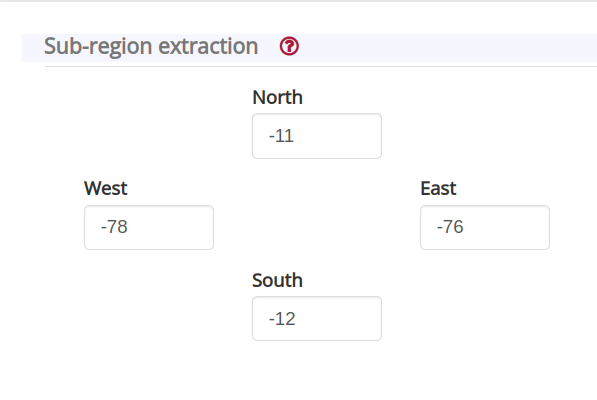

## ERA5 reanalysis single levels ## SJO_500M

In [8]:
import os
import time
import cdsapi

def generar_nombre_archivo(year, month, day, hour):
    return f"ERA.{year}{month:02d}{day:02d}{hour:02d}.levels.grib"

# 
years = [2020]
months = [1]

c = cdsapi.Client(timeout=100000,quiet=False,debug=True) 
for year in years:
    for month in months:
        for day in range(1, 32):
            for hour in range(24):
                file_path = f"/home/juantuf/Descargas/eraland/{generar_nombre_archivo(year, month, day, hour)}"
                
                descargado_exitosamente = False
                
                intentos = 0
                max_intentos = 3
                while not descargado_exitosamente and intentos < max_intentos:
                    result = c.retrieve(
                        'reanalysis-era5-single-levels',
                        {
                            'product_type': 'reanalysis',
                            'format': 'grib',
                            'variable': [
                                '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
                                '2m_temperature', 'surface_pressure', 'surface_solar_radiation_downwards',
                                'surface_thermal_radiation_downwards', 'total_precipitation',
                            ],
                            'year': str(year),
                            'month': f"{month:02d}",
                            'day': f"{day:02d}",
                            'time': f"{hour:02d}:00",
                            # To modify
                            'area': [
                                -11, -78, -15,
                                -74,
                            ],
                        },
                        file_path
                    )
                    
                    file_size = os.path.getsize(file_path)
                    if file_size > 0:
                        print(f"Archivo descargado y guardado: {file_path}")
                        descargado_exitosamente = True
                    else:
                        print(f"El archivo descargado está vacío: {file_path}. Intentando de nuevo...")
                        time.sleep(1)  
                        intentos += 1
                
                if not descargado_exitosamente:
                    print(f"No se pudo descargar el archivo después de {max_intentos} intentos: {file_path}")


## ERA5 reanalysis single levels ## SJO_500M

In [1]:
# import os
# import time
# import cdsapi
# import concurrent.futures

# base_directory = "/home/juantuf/Descargas/eraland/"

# def generate_filename(year, month, day, hour):
#     return os.path.join(base_directory, f"ERA.{year}{month:02d}{day:02d}{hour:02d}.levels.grib")

# def download_file(year, month, day, hour):
#     file_path = generate_filename(year, month, day, hour)
#     download_successful = False
#     attempts = 0
#     max_attempts = 3
    
#     while not download_successful and attempts < max_attempts:
#         try:
#             c.retrieve(
#                 'reanalysis-era5-land',
#                 {
#                     'variable': [
#                         '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
#                         '2m_temperature', 'surface_pressure', 'surface_solar_radiation_downwards',
#                         'surface_thermal_radiation_downwards', 'total_precipitation',
#                     ],
#                     'year': str(year),
#                     'month': f"{month:02d}",
#                     'day': f"{day:02d}",
#                     'time': f"{hour:02d}:00",
#                     'area': [
#                         -13, -71, -15, -67,
#                     ],
#                     'format': 'grib',
#                 },
#                 file_path
#             )
#             time.sleep(5) 
            
#             if os.path.exists(file_path):
#                 file_size = os.path.getsize(file_path)
#                 if file_size > 0:
#                     print(f"File downloaded and saved: {file_path}")
#                     download_successful = True
#                 else:
#                     print(f"The downloaded file is empty: {file_path}. Retrying...")
#                     time.sleep(1)
#                     attempts += 1
#             else:
#                 print(f"File not found: {file_path}. Retrying...")
#                 time.sleep(1)
#                 attempts += 1
                
#         except Exception as e:
#             print(f"Error downloading file: {e}. Retrying...")
#             time.sleep(1)
#             attempts += 1
    
#     if not download_successful:
#         print(f"Failed to download file after {max_attempts} attempts: {file_path}")

# years = [2024]
# months = [1]

# c = cdsapi.Client(timeout=100000, quiet=False, debug=True)

# tasks = []
# for year in years:
#     for month in months:
#         for day in range(1, 32):
#             for hour in range(24):
#                 tasks.append((year, month, day, hour))

# with concurrent.futures.ThreadPoolExecutor(max_workers=4) as executor:
#     futures = [executor.submit(download_file, *task) for task in tasks]
#     for future in concurrent.futures.as_completed(futures):
#         future.result()


 -10, -76, -18, -64,

In [2]:
# import os
# import time
# import cdsapi

# def generar_nombre_archivo(year, month, day, hour):
#     return f"ERA.{year}{month:02d}{day:02d}{hour:02d}.levels.grib"

# years = [2000]
# months = [3]

# c = cdsapi.Client(timeout=100000, quiet=False, debug=True)
# for year in years:
#     for month in months:
#         for day in range(1, 32):
#             for hour in range(24):
#                 file_path = f"/home/juantuf/Descargas/eraland/{generar_nombre_archivo(year, month, day, hour)}"
                
#                 descargado_exitosamente = False
#                 intentos = 0
#                 max_intentos = 3
                
#                 while not descargado_exitosamente and intentos < max_intentos:
#                     try:
#                         c.retrieve(
#                             'reanalysis-era5-land',
#                             {
#                                 'variable': [
#                                     '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
#                                     '2m_temperature', 'surface_pressure', 'surface_solar_radiation_downwards',
#                                     'surface_thermal_radiation_downwards', 'total_precipitation',
#                                 ],
#                                 'year': str(year),
#                                 'month': f"{month:02d}",
#                                 'day': f"{day:02d}",
#                                 'time': f"{hour:02d}:00",
#                                 'area': [
#                                     -13, -71, -15, -67,
#                                 ],
#                                 'format': 'grib',
#                             },
#                             file_path
#                         )
                        
#                         file_size = os.path.getsize(file_path)
#                         if file_size > 0:
#                             print(f"Archivo descargado y guardado: {file_path}")
#                             descargado_exitosamente = True
#                         else:
#                             print(f"El archivo descargado está vacío: {file_path}. Intentando de nuevo...")
#                             time.sleep(1) 
#                             intentos += 1
#                     except Exception as e:
#                         print(f"Error durante la descarga: {e}. Intentando de nuevo...")
#                         time.sleep(1) 
#                         intentos += 1
                
#                 if not descargado_exitosamente:
#                     print(f"No se pudo descargar el archivo después de {max_intentos} intentos: {file_path}")


### **FINAL VERSION!!!![Obrajillo]** #####



In [ ]:
# import os
# import time
# import cdsapi
# import concurrent.futures

# base_directory = "/home/juantuf/Descargas/eraland/"

# def generate_filename(year, month, day, hour):
#     return os.path.join(base_directory, f"ERA.{year}{month:02d}{day:02d}{hour:02d}.levels.grib")

# def download_file(year, month, day, hour):
#     file_path = generate_filename(year, month, day, hour)
#     download_successful = False
#     attempts = 0
#     max_attempts = 3
    
#     while not download_successful and attempts < max_attempts:
#         try:
#             c.retrieve(
#                 'reanalysis-era5-land',
#                 {
#                     'variable': [
#                         '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
#                         '2m_temperature', 'surface_pressure', 'surface_solar_radiation_downwards',
#                         'surface_thermal_radiation_downwards', 'total_precipitation',
#                     ],
#                     'year': str(year),
#                     'month': f"{month:02d}",
#                     'day': f"{day:02d}",
#                     'time': f"{hour:02d}:00",
#                     'area': [
#                         -10, -77, -12, -75,
#                     ],
#                     'format': 'grib',
#                 },
#                 file_path
#             )
#             time.sleep(5) 
            
#             if os.path.exists(file_path):
#                 file_size = os.path.getsize(file_path)
#                 if file_size > 0:
#                     print(f"File downloaded and saved: {file_path}")
#                     download_successful = True
#                 else:
#                     print(f"The downloaded file is empty: {file_path}. Retrying...")
#                     time.sleep(1)
#                     attempts += 1
#             else:
#                 print(f"File not found: {file_path}. Retrying...")
#                 time.sleep(1)
#                 attempts += 1
                
#         except Exception as e:
#             print(f"Error downloading file: {e}. Retrying...")
#             time.sleep(1)
#             attempts += 1
    
#     if not download_successful:
#         print(f"Failed to download file after {max_attempts} attempts: {file_path}")

# years = [2000]
# months = [5]

# c = cdsapi.Client(timeout=100000, quiet=False, debug=True)

# tasks = []
# for year in years:
#     for month in months:
#         for day in range(1, 32):
#             for hour in range(24):
#                 tasks.append((year, month, day, hour))

# def download_task_wrapper(task):
#     year, month, day, hour = task
#     download_file(year, month, day, hour)
#     time.sleep(10)  

# with concurrent.futures.ThreadPoolExecutor(max_workers=2) as executor:  
#     futures = [executor.submit(download_task_wrapper, task) for task in tasks]
#     for future in concurrent.futures.as_completed(futures):
#         future.result()


In [1]:
# import os
# import time
# import cdsapi
# import concurrent.futures

# base_directory = "/home/juantuf/Descargas/eraland/"

# def generate_filename(year, month, day, hour):
#     return os.path.join(base_directory, f"ERA.{year}{month:02d}{day:02d}{hour:02d}.levels.grib")

# def download_file(year, month, day, hour):
#     file_path = generate_filename(year, month, day, hour)
#     download_successful = False
#     attempts = 0
#     max_attempts = 3
    
#     while not download_successful and attempts < max_attempts:
#         try:
#             c.retrieve(
#                 'reanalysis-era5-land',
#                 {
#                     'variable': [
#                         '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
#                         '2m_temperature', 'surface_pressure', 'surface_solar_radiation_downwards',
#                         'surface_thermal_radiation_downwards', 'total_precipitation',
#                     ],
#                     'year': str(year),
#                     'month': f"{month:02d}",
#                     'day': f"{day:02d}",
#                     'time': f"{hour:02d}:00",
#                     'area': [
#                         -10, -77, -12, -75,
#                     ],
#                     'format': 'grib',
#                 },
#                 file_path
#             )
#             time.sleep(5)
            
#             if os.path.exists(file_path):
#                 file_size = os.path.getsize(file_path)
#                 if file_size > 0:
#                     print(f"File downloaded and saved: {file_path}")
#                     download_successful = True
#                 else:
#                     print(f"The downloaded file is empty: {file_path}. Retrying...")
#                     time.sleep(1)
#                     attempts += 1
#             else:
#                 print(f"File not found: {file_path}. Retrying...")
#                 time.sleep(1)
#                 attempts += 1
                
#         except Exception as e:
#             print(f"Error downloading file: {e}. Retrying...")
#             time.sleep(1)
#             attempts += 1
    
#     if not download_successful:
#         print(f"Failed to download file after {max_attempts} attempts: {file_path}")

# years = [2000]
# months = [3,4,5,6,7,8,9,10,11,12]

# c = cdsapi.Client(timeout=100000, quiet=False, debug=True)

# tasks = []
# for year in years:
#     for month in months:
#         for day in range(1, 32):
#             for hour in range(24):
#                 tasks.append((year, month, day, hour))

# def download_task_wrapper(task):
#     year, month, day, hour = task
#     download_file(year, month, day, hour)
#     time.sleep(10)

# def chunk_tasks(tasks, chunk_size):
#     for i in range(0, len(tasks), chunk_size):
#         yield tasks[i:i + chunk_size]

# chunk_size = 24  
# for task_chunk in chunk_tasks(tasks, chunk_size):
#     with concurrent.futures.ThreadPoolExecutor(max_workers=chunk_size) as executor:
#         futures = [executor.submit(download_task_wrapper, task) for task in task_chunk]
#         for future in concurrent.futures.as_completed(futures):
#             future.result()
#     time.sleep(10)

## **WITHOUT MESSAGES** ##

In [7]:
# from IPython.utils import io

# with io.capture_output() as captured:
#     import os
#     import time
#     import cdsapi
#     import concurrent.futures
#     import logging

#     base_directory = "/home/juantuf/Descargas/eraland_22_23/"
#     log_file_all = "/home/juantuf/Descargas/all_logs.txt"

#     logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s',
#                         handlers=[logging.FileHandler(log_file_all)])

#     def generate_filename(year, month, day, hour):
#         return os.path.join(base_directory, f"ERA.{year}{month:02d}{day:02d}{hour:02d}.levels.grib")

#     def get_last_downloaded_file():
#         try:
#             files = [f for f in os.listdir(base_directory) if f.startswith("ERA.") and f.endswith(".grib")]
#             files.sort(reverse=True)
#             if files:
#                 last_file = files[0]
#                 base_name = os.path.basename(last_file)
#                 year = int(base_name[4:8])
#                 month = int(base_name[8:10])
#                 day = int(base_name[10:12])
#                 hour = int(base_name[12:14])
#                 return year, month, day, hour
#         except Exception as e:
#             with open(log_file_all, 'a') as log_file:
#                 log_file.write(f"Error retrieving last downloaded file: {e}\n")
#         return None

#     def download_file(year, month, day, hour):
#         file_path = generate_filename(year, month, day, hour)
#         download_successful = False
#         attempts = 0
#         max_attempts = 3
        
#         while not download_successful and attempts < max_attempts:
#             try:
#                 c.retrieve(
#                     'reanalysis-era5-land',
#                     {
#                         'variable': [
#                             '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
#                             '2m_temperature', 'surface_pressure', 'surface_solar_radiation_downwards',
#                             'surface_thermal_radiation_downwards', 'total_precipitation',
#                         ],
#                         'year': str(year),
#                         'month': f"{month:02d}",
#                         'day': f"{day:02d}",
#                         'time': f"{hour:02d}:00",
#                         'area': [
#                             -10, -77, -12, -75,
#                         ],
#                         'format': 'grib',
#                     },
#                     file_path
#                 )
#                 time.sleep(5)
                
#                 if os.path.exists(file_path):
#                     file_size = os.path.getsize(file_path)
#                     if file_size > 0:
#                         download_successful = True
#                     else:
#                         time.sleep(1)
#                         attempts += 1
#                 else:
#                     time.sleep(1)
#                     attempts += 1
                    
#             except Exception as e:
#                 with open(log_file_all, 'a') as log_file:
#                     log_file.write(f"Error downloading file: {e}. Retrying...\n")
#                 time.sleep(1)
#                 attempts += 1
        
#         if not download_successful:
#             with open(log_file_all, 'a') as log_file:
#                 log_file.write(f"Failed to download file after {max_attempts} attempts: {file_path}\n")

#     years = [2022]
#     months = [1,2,3,4,5,6,7,8,9,10,11,12]

#     c = cdsapi.Client(timeout=100000, quiet=True)

#     last_download = get_last_downloaded_file()
#     if last_download:
#         start_year, start_month, start_day, start_hour = last_download
#     else:
#         start_year, start_month, start_day, start_hour = years[0], months[0], 1, 0

#     tasks = []
#     for year in years:
#         for month in months:
#             for day in range(1, 32):
#                 for hour in range(24):
#                     if (year > start_year or
#                         (year == start_year and month > start_month) or
#                         (year == start_year and month == start_month and day > start_day) or
#                         (year == start_year and month == start_month and day == start_day and hour > start_hour)):
#                         tasks.append((year, month, day, hour))

#     def download_task_wrapper(task):
#         year, month, day, hour = task
#         download_file(year, month, day, hour)
#         time.sleep(10)

#     def chunk_tasks(tasks, chunk_size):
#         for i in range(0, len(tasks), chunk_size):
#             yield tasks[i:i + chunk_size]

#     chunk_size = 24  
#     for task_chunk in chunk_tasks(tasks, chunk_size):
#         with concurrent.futures.ThreadPoolExecutor(max_workers=chunk_size) as executor:
#             futures = [executor.submit(download_task_wrapper, task) for task in task_chunk]
#             for future in concurrent.futures.as_completed(futures):
#                 future.result()
#         time.sleep(10)


In [ ]:
from IPython.utils import io

with io.capture_output() as captured:
    import os
    import time
    import cdsapi
    import concurrent.futures
    import logging
    import sys

    base_directory = "/home/juantuf/Descargas/eraland_00_01/"
    log_file_path = "/home/juantuf/Descargas/last_download.txt"
    log_file_all = "/home/juantuf/Descargas/all_logs.txt"

    logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s',
                        handlers=[logging.FileHandler(log_file_all)])

    def generate_filename(year, month, day, hour):
        return os.path.join(base_directory, f"ERA.{year}{month:02d}{day:02d}{hour:02d}.levels.grib")

    def log_last_download(file_path):
        with open(log_file_path, 'w') as log_file:
            log_file.write(f"Last downloaded file: {file_path}\n")

    def download_file(year, month, day, hour):
        file_path = generate_filename(year, month, day, hour)
        download_successful = False
        attempts = 0
        max_attempts = 3
        
        while not download_successful and attempts < max_attempts:
            try:
                c.retrieve(
                    'reanalysis-era5-land',
                    {
                        'variable': [
                            '10m_u_component_of_wind', '10m_v_component_of_wind', '2m_dewpoint_temperature',
                            '2m_temperature', 'surface_pressure', 'surface_solar_radiation_downwards',
                            'surface_thermal_radiation_downwards', 'total_precipitation',
                        ],
                        'year': str(year),
                        'month': f"{month:02d}",
                        'day': f"{day:02d}",
                        'time': f"{hour:02d}:00",
                        'area': [
                            -10, -77, -12, -75,
                        ],
                        'format': 'grib',
                    },
                    file_path
                )
                time.sleep(5)
                
                if os.path.exists(file_path):
                    file_size = os.path.getsize(file_path)
                    if file_size > 0:
                        download_successful = True
                        log_last_download(file_path)
                    else:
                        time.sleep(1)
                        attempts += 1
                else:
                    time.sleep(1)
                    attempts += 1
                    
            except Exception as e:
                with open(log_file_all, 'a') as log_file:
                    log_file.write(f"Error downloading file: {e}. Retrying...\n")
                time.sleep(1)
                attempts += 1
        
        if not download_successful:
            with open(log_file_all, 'a') as log_file:
                log_file.write(f"Failed to download file after {max_attempts} attempts: {file_path}\n")

    years = [2008]
    months = [1]

    c = cdsapi.Client(timeout=100000, quiet=True)

    tasks = []
    for year in years:
        for month in months:
            for day in range(1, 32):
                for hour in range(24):
                    tasks.append((year, month, day, hour))

    def download_task_wrapper(task):
        year, month, day, hour = task
        download_file(year, month, day, hour)
        time.sleep(10)

    def chunk_tasks(tasks, chunk_size):
        for i in range(0, len(tasks), chunk_size):
            yield tasks[i:i + chunk_size]

    chunk_size = 24  
    for task_chunk in chunk_tasks(tasks, chunk_size):
        with concurrent.futures.ThreadPoolExecutor(max_workers=chunk_size) as executor:
            futures = [executor.submit(download_task_wrapper, task) for task in task_chunk]
            for future in concurrent.futures.as_completed(futures):
                future.result()
        time.sleep(10)
